1.First of all we will do the analysis of the data and try to find more about it.

2.Model training - create model(s) to learn to predict a target variable based on other variables.

3.Model evaluation - evaluating a models predictions using problem-specific evaluation metrics.

4.Model comparison - comparing several different models to find the best one.

5.Hyperparameter tuning - finding better values for hyperparameters that can improve performance.

6.save the model and go for the result of prediction

1.First of all we will do the analysis of the data and try to find more about it.

2.Model training - create model(s) to learn to predict a target variable based on other variables.

3.Model evaluation - evaluating a models predictions using problem-specific evaluation metrics.

4.Model comparison - comparing several different models to find the best one.



1.First of all we will do the analysis of the data and try to find more about it.

2.Model training - create model(s) to learn to predict a target variable based on other variables.

3.Model evaluation - evaluating a models predictions using problem-specific evaluation metrics.

4.Model comparison - comparing several different models to find the best one.

5.Hyperparameter tuning - finding better values for hyperparameters that can improve performance.

6.save the model and go for the result of prediction

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
rent=pd.read_csv('Datasets/House_Rent_Dataset.csv')
rent.shape
rent.head(10)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
5,2022-04-29,2,7000,600,Ground out of 1,Super Area,Thakurpukur,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
6,2022-06-21,2,10000,700,Ground out of 4,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,2,Contact Agent
7,2022-06-21,1,5000,250,1 out of 2,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,1,Contact Agent
8,2022-06-07,2,26000,800,1 out of 2,Carpet Area,"Palm Avenue Kolkata, Ballygunge",Kolkata,Unfurnished,Bachelors,2,Contact Agent
9,2022-06-20,2,10000,1000,1 out of 3,Carpet Area,Natunhat,Kolkata,Semi-Furnished,Bachelors/Family,2,Contact Owner


<Axes: >

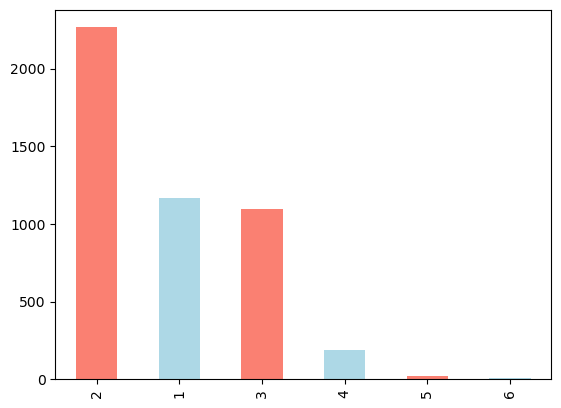

In [85]:
rent.BHK.value_counts(normalize=True)
rent.BHK.value_counts().plot(kind='bar',color=['salmon','lightblue'])

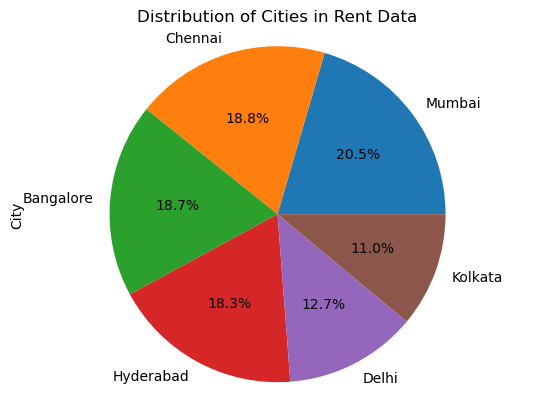

In [86]:
rent.describe()
rent.BHK.value_counts()
rent.Bathroom.value_counts()
rent.City.value_counts()
rent.City.value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Cities in Rent Data')
plt.show()

this plot shows the cities in which tenant can try for rent- houses

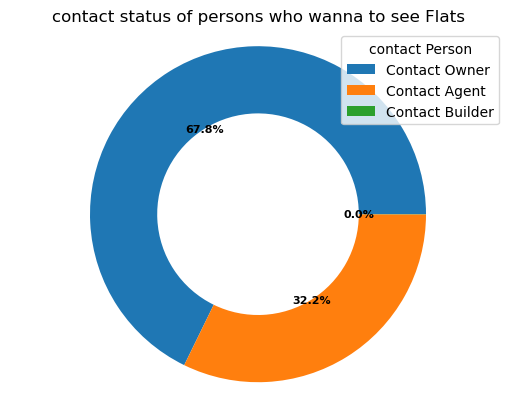

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
4061,2022-06-18,1,5500,400,1 out of 2,Super Area,"Ramanthapur, NH 2 2",Hyderabad,Unfurnished,Bachelors/Family,1,Contact Builder


In [87]:
wedges,texts,autotexts=plt.pie(
    rent["Point of Contact"].value_counts(),
    autopct="%1.1f%%",
    wedgeprops=dict(width=0.4),
)
plt.legend(wedges,rent["Point of Contact"].unique(),title="contact Person")
plt.title("contact status of persons who wanna to see Flats")
plt.setp(autotexts,size=8,weight="bold")
plt.axis("equal")
plt.show()

rent[rent["Point of Contact"]=="Contact Builder"]

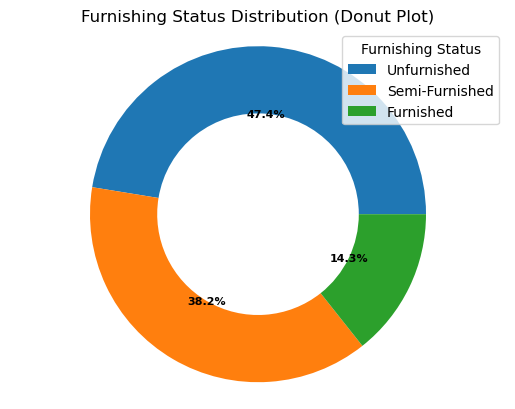

In [88]:
wedges, texts, autotexts = plt.pie(
    rent['Furnishing Status'].value_counts(),
    autopct='%1.1f%%',
    wedgeprops=dict(width=0.4),  # Creates the donut effect
)

plt.legend(wedges, rent['Furnishing Status'].unique(), title='Furnishing Status')
plt.title('Furnishing Status Distribution (Donut Plot)')
plt.setp(autotexts, size=8, weight='bold')
plt.axis('equal')
plt.show()

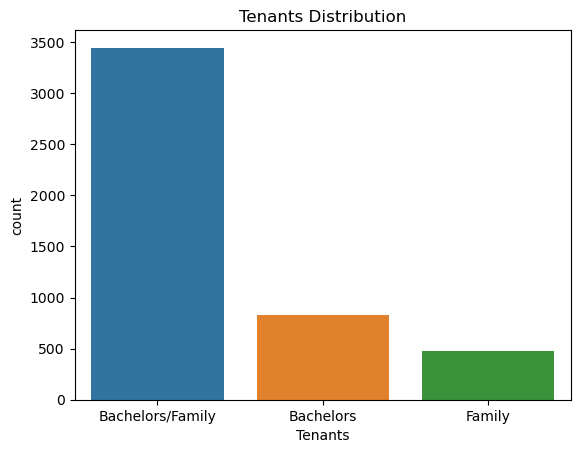

In [89]:
rent['Tenant Preferred'].value_counts()
sns.countplot(data=rent,x='Tenant Preferred')
plt.title('Tenants Distribution')
plt.xlabel('Tenants')
plt.ylabel('count')
plt.show()

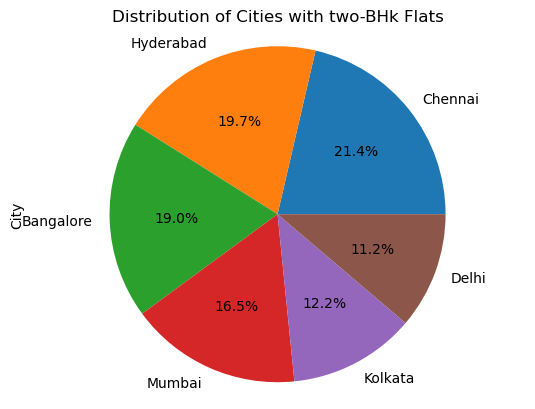

In [90]:
rent["City"].value_counts()
# i want to calculate the the number of 2 bhk rooms available in  city in datasets
x=rent[rent["BHK"]==2]
y=x["City"].value_counts()
y.plot(kind="pie",autopct="%1.1f%%")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Cities with two-BHk Flats')
plt.show()

In [91]:


import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Create a copy of the DataFrame to avoid modifying the original data
encoded_rent = rent.copy()

columns_to_encode = ["Area Locality", "City", "Furnishing Status", "Area Type", "Posted On", "Floor", "Tenant Preferred", "Point of Contact"]

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

for column in columns_to_encode:
    encoded_rent[column] = label_encoder.fit_transform(encoded_rent[column])

# Save the encoded DataFrame to a CSV file
encoded_rent.to_csv('Datasets/House_rent_converted.csv', index=False)


<Axes: >

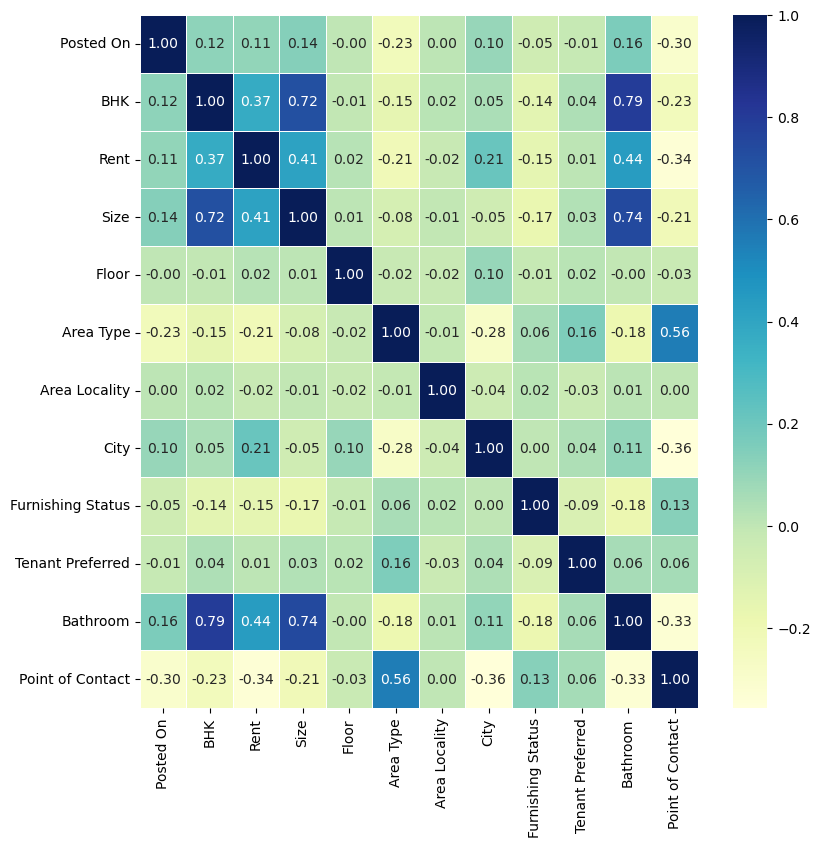

In [92]:
new_rent=pd.read_csv('Datasets/House_rent_converted.csv')
new_rent
corr_matrix=new_rent.corr()
plt.figure(figsize=(9,9))
sns.heatmap(corr_matrix,annot=True,
            linewidth=0.5,
            fmt='.2f',
            cmap='YlGnBu')

In [93]:

new_rent.head(20)
x=new_rent.drop("Rent",axis=1)
y=new_rent.Rent.values
y
print(x.head(10))

   Posted On  BHK  Size  Floor  Area Type  Area Locality  City  \
0         26    2  1100    455          2            221     4   
1         21    2   800     14          2           1527     4   
2         24    2  1000     14          2           1760     4   
3         73    2   800     10          2            526     4   
4         17    2   850     10          1           1890     4   
5          7    2   600    447          2           1975     4   
6         60    2   700    458          2           1184     4   
7         60    1   250     10          2           1184     4   
8         46    2   800     10          1           1476     4   
9         59    2  1000     14          1           1358     4   

   Furnishing Status  Tenant Preferred  Bathroom  Point of Contact  
0                  2                 1         2                 2  
1                  1                 1         1                 2  
2                  1                 1         1                 2

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


np.random.seed(42)
X_train,X_test,y_train,y_test=train_test_split(x,#independent variables
                                               y,#dependent variable
                                               test_size=0.2  ) #percentage 
#a thumb ru;e is to use 80% of your data to train and other 20% of your data to test

In [95]:
X_train.head()

,Posted On,BHK,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
1995,18,2,950,372,2,309,0,1,1,2,2
1497,62,2,800,270,2,1316,0,1,1,2,2
2763,52,1,545,196,2,530,2,0,1,1,2
1351,76,1,465,270,2,2182,5,1,0,1,2
1862,73,2,900,313,2,303,0,0,1,2,2


In [96]:
y_train,len(y_train)

#Here we have 3796 datapoints to train our model 

(array([23500, 10500, 19000, ..., 20000, 85000, 25000], dtype=int64), 3796)

In [97]:
X_test.head()

,Posted On,BHK,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
1566,62,2,1100,198,2,844,0,2,1,2,2
3159,20,2,800,196,2,1213,1,0,1,2,2
538,18,2,518,333,1,287,5,1,1,2,2
2630,47,3,1500,1,1,392,2,2,1,3,2
4418,75,3,2235,448,1,590,3,2,2,5,0


In [98]:
y_test,len(y_test)

#here we have 950 datapoints to test our model.

(array([  16000,   12000,   28000,    8000,   46000,   17000,   57000,
           9500,  400000,   15000,   10000,   12000,   27000,   16000,
          15000,    8500,  140000,   12000,    6000,   60000,   38000,
           7500,   23000,   14000,  260000,    5000,    6000,   16500,
           6500,   15000,    5000,   14000,    5000,   12000,   25000,
          25000,    7500,    6000,   17000,    7000,   13000,  320000,
          14000,    6000,   60000,   14000,   32000,   65000,  350000,
          15000,   11000,   35000,   18000,   12000,   65000,  130000,
          35000,   40000,    9000,    9000,   18000,    5000,  130000,
          12000,   50000,   20000,   18000,   15500,   34999,   30000,
          13000,   24000,  100000,    7000,   25000,   35000,   12000,
          61500,   35000,   28000,   14000,   10000,   33500,   10000,
          12000,   45000,   36000,   18000,   25000,   27000,  260000,
          35000,   24000,  120000,   13000,   12000,   11000,    7000,
      

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


models={"Random Forest":RandomForestRegressor(),
        "Lasso Regression":LinearRegression(),
        "Gradient Boosting":GradientBoostingRegressor(),
        }

#create a function to fit the model:- 
def fit_and_score(models,X_train,X_test,y_train,y_test):
    np.random.seed(42)
    #make list to keep the models at a place 
    model_scores={}
    
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_scores[name]=model.score(X_test,y_test)
    return model_scores
model_scores=fit_and_score(models=models,
                           X_train=X_train,
                           X_test=X_test,
                           y_train=y_train,
                           y_test=y_test)
model_scores  

{'Random Forest': 0.5814684203464362,
 'Lasso Regression': 0.4615672875218316,
 'Gradient Boosting': 0.49170195903153413}

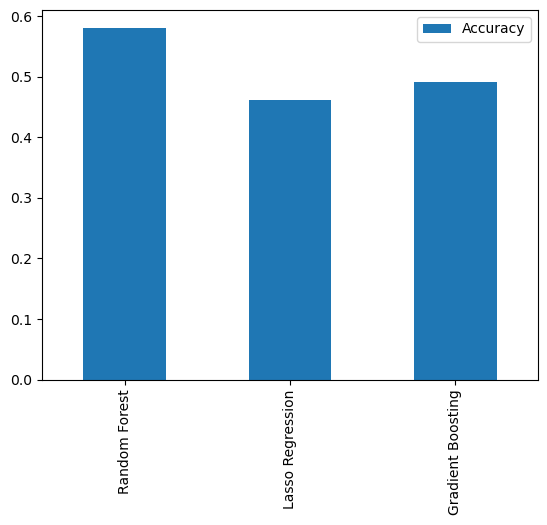

In [100]:
  
model_compare=pd.DataFrame(model_scores,index=["Accuracy"])
model_compare.T.plot.bar();

In [101]:
# randomized search CV

n_estimators = [int(x) for x in np.linspace(start=100, stop=400, num=5)]  # Narrowed range
max_features = ['sqrt']  # Stick with 'sqrt' for diversity
max_depth = [int(x) for x in np.linspace(7, 30, num=3)]  # Reduced range
min_samples_split = [2, 5, 10]  # Smaller values for finer control
min_samples_leaf = [1, 2, 4]  # Smaller values for finer control

In [102]:
# create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf_random = RandomizedSearchCV(estimator = models["Random Forest"], param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter=5)

rf_random.fit(X_train,y_train)


RandomizedSearchCV(estimator=RandomForestRegressor(), n_iter=5,
                   param_distributions={'max_depth': [7, 18, 30],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 175, 250, 325,
                                                         400]},
                   scoring='neg_mean_squared_error')

In [103]:
rf_random.best_params_

{'n_estimators': 325,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 30}

In [104]:
prediction = rf_random.predict(X_test)   

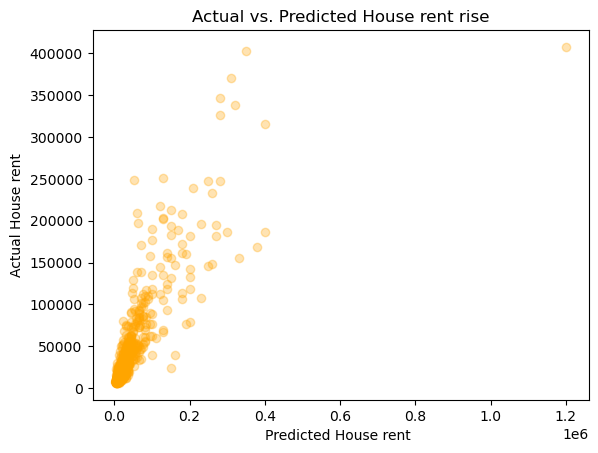

In [105]:
plt.scatter(y_test,prediction,alpha =0.3,color="Orange")
plt.title('Actual vs. Predicted House rent rise')
plt.xlabel('Predicted House rent ')
plt.ylabel('Actual House rent');

In [106]:
print("MAE:" , mean_absolute_error(y_test,prediction))
print("MSE:" , mean_squared_error(y_test,prediction))
print("RMSE:" , np.sqrt(mean_squared_error(y_test,prediction)))

MAE: 12050.344687329789
MSE: 1278838662.7717865
RMSE: 35760.85377576697


In [107]:
test_df = pd.DataFrame({
    "Predicted House rent" : models["Random Forest"].predict(X_test),
    "Actual House rent" : y_test,
}).reset_index(drop = True)
test_df


,Predicted House rent,Actual House rent
0,19760.0,16000
1,15395.0,12000
2,28890.0,28000
3,47650.0,8000
4,94170.0,46000
...,...,...
945,15145.0,18000
946,19780.0,25000
947,14410.0,14000
948,17445.0,26000


In [108]:
#Saving the model
import pickle as pkl
file = open("House_Rent_Prediction.pkl", 'wb')
pkl.dump(models["Random Forest"], file)


In [109]:
#Open  the model:- -
model = open('House_Rent_Prediction.pkl','rb')
House_Rent_Prediction = pkl.load(model)

In [110]:
print(f'R2 score {r2_score(y_test,House_Rent_Prediction.predict(X_test))}')
print("MAE:" , mean_absolute_error(y_test,House_Rent_Prediction.predict(X_test)))
print("MSE:" , mean_squared_error(y_test,House_Rent_Prediction.predict(X_test)))
print("RMSE:" , np.sqrt(mean_squared_error(y_test,House_Rent_Prediction.predict(X_test)))) 

R2 score 0.5814684203464362
MAE: 13158.39376140351
MSE: 1668007938.1982958
RMSE: 40841.2528970194


## Our Prediction House rent price will be nearly :- $13158.40